In [ ]:
#Problem Question: What customer behaviors and attributes are most correlated with churn and how can the company reduce customer attrition?


In [4]:
#Import Libraries & Load Data 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
#Read CSV file and show first 5 rows

df = pd.read_csv("/Users/ryanmcdonnell/Downloads/customerchurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
#Basic data summaries

print(df.shape) #shows how many rows and columns
print(df.dtypes) #shows data type for each column
print(df.isnull().sum()) #shows total amount of rows that are null for each column
print(df.describe()) #for numeric values shows count, mean, median, etc.




(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod

In [18]:
#Check for duplicate values

df['customerID'].duplicated().sum()


0

In [30]:
#Looking at unique values for Internet Service field

df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [32]:
#Finding how many times 'No' is recorded in Internet Service field

(df['InternetService'] == 'No').sum()

1526

In [10]:
#Dropping the 'No' response rows in Internet Service field. This response will skew the visualization.

df = df[df['InternetService'] != 'No']


In [16]:
#Looking at unique values for Senior Citizen field

df['SeniorCitizen'].unique()

array([0, 1])

In [18]:
#Dropping the Senior Citizen field. This field is irrelevenat to my analysis.

df = df.drop('SeniorCitizen', axis=1)


In [20]:
#Data cleaning and formatting

df['Churn'] = df['Churn'].str.strip().str.lower() #standarize churn column by removing spaces and making lowercase

df['ChurnFlag'] = df['Churn'].map({'yes': 1, 'no': 0}) #map the yes and no response to numeric values 1 and 2 for visualization purposes

df.dropna(inplace=True) #if any rows have a N/A it removes it


In [22]:
#Exploratory Data Analysis - Monthly Charges & Contract Type

# Grouped stats
print(df.groupby('Churn')['MonthlyCharges'].mean())
print(df.groupby('Churn')['tenure'].mean())

# Correlation
corr = df.corr(numeric_only=True)
print(corr['ChurnFlag'].sort_values(ascending=False))


Churn
no     76.341532
yes    77.920985
Name: MonthlyCharges, dtype: float64
Churn
no     39.538155
yes    18.605923
Name: tenure, dtype: float64
ChurnFlag         1.00000
MonthlyCharges    0.03356
tenure           -0.39650
Name: ChurnFlag, dtype: float64


In [ ]:
#Takeaways: Churners have a much lower average tenure than those non churners. Theres a strong negative correlation between tenure and churn

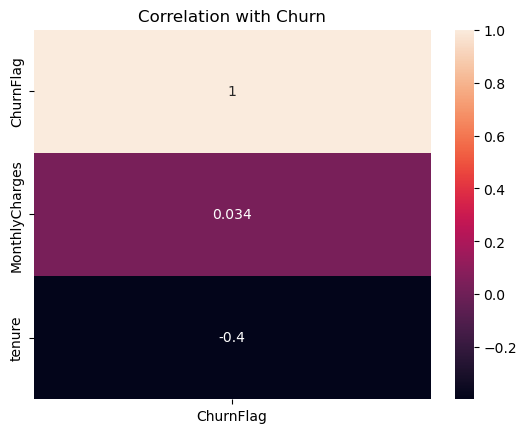

In [24]:
#Run a heat map using the 'corr' variable looking at numeric values and the revised churn data being numerized

sns.heatmap(corr[['ChurnFlag']].sort_values(by='ChurnFlag', ascending=False), annot=True)
plt.title("Correlation with Churn")
plt.show()


In [ ]:
#Takeaways - The results show a negative correlation between tenure and churn. Those with more tenure are less likely to churn.
#Positive correlation between Senior Citizen and churn. Senior citizen are more likely to churn

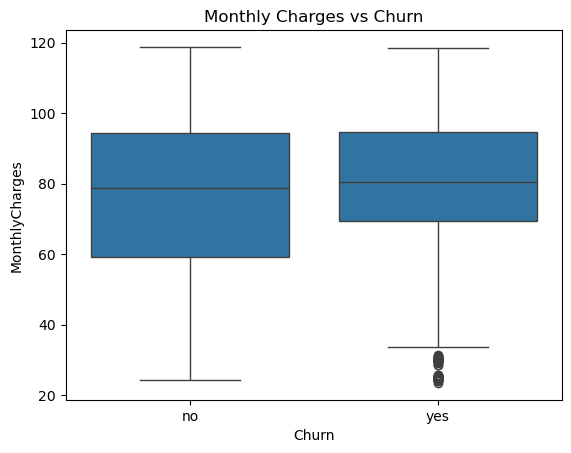

In [58]:
#Visualization - Monthly Charges

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()



In [ ]:
#Takeaways : Boxplot - More variability in charges for non churners. Churners data is skewed with longer whiskers

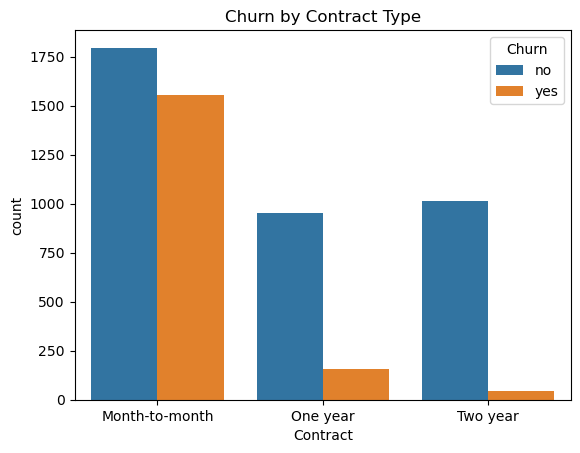

In [60]:
#Visualization - Contract Type

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

In [ ]:
#Takeaways : Bar graph - customers who have month to month contracts have much higher churn rate than those
# who have a one year or two year contract

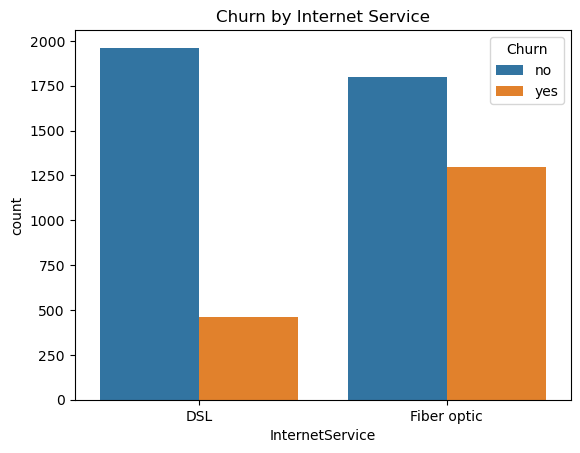

In [40]:
#Exploratory Data Analysis and Visualization - Internet Service

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()

In [ ]:
#Takeaways: Those with fiber optic have a much higher churn rate than DSL (more than double)

In [ ]:
#Final Takeaways: 
#Attributes that appear to have the highest correlation to churn are tenure and contract type. 
#Customers who are month to month to month are much more likely to churn than those in one/two year long contracts
#Although there is a positive correlation with monthly charges, its not as high as tenure
#Would suggest highly promoting one/two year contracts that are attractive to customers to reduce likelyhood of churn